# Topic Model Trends &mdash; Demo 

In this notebook we visualize a previously generated topic model. We use data exported from a Constellate search on the term `hyperparameter`.

# Set Up

## Imports

In [23]:
import pandas as pd
import numpy as np

## Configuration

In [98]:
data_prefix = 'jstor_hyperparameter_demo'
db_dir = './db'

In [25]:
data_prefix

'jstor_hyperparameter'

## Import Topic Data

We import our previously generated model.

In [26]:
topic_model_suffix = '_NMF'
# topic_model_suffix = ''

In [27]:
LABELS = pd.read_csv(f"{db_dir}/{data_prefix}-LABELS.csv").set_index('doc_id')
VOCAB = pd.read_csv(f"{db_dir}/{data_prefix}-VOCAB.csv").set_index('term_str')
BOW = pd.read_csv(f"{db_dir}/{data_prefix}-BOW.csv").set_index(['doc_id','term_str'])
TOPICS = pd.read_csv(f"{db_dir}/{data_prefix}-TOPICS{topic_model_suffix}.csv").set_index('topic_id')
THETA = pd.read_csv(f"{db_dir}/{data_prefix}-THETA{topic_model_suffix}.csv").set_index('doc_id')
THETA.columns.name = 'topic_id'
THETA.columns = [int(col) for col in THETA.columns] # Should change columns to strings
PHI = pd.read_csv(f"{db_dir}/{data_prefix}-PHI{topic_model_suffix}.csv").set_index('topic_id')
PHI.columns.name = 'term_str'

In [28]:
n_topics = len(TOPICS)
topic_cols = [t for t in range(n_topics)]

# Show Graphs

In [57]:
TOPICS['gloss'] = ['Bayesian models', 'French', 'MCMC', 'priors', 'economics', 'random effects', 'variable selection',
                 'empirical Bayes', 'env biology', 'genetics']

In [36]:
THETA['label'] = LABELS['doc_year']

In [71]:
TRENDS = THETA.groupby('label').mean()
# TRENDS.columns = TOPICS.topwords.str.extract(r'^(.{20})')[0]
TRENDS.columns = TOPICS.gloss

In [72]:
TRENDS.style.background_gradient()

gloss,Bayesian models,French,MCMC,priors,economics,random effects,variable selection,empirical Bayes,env biology,genetics
label,,,,,,,,,,
1969,0.014073,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.223419,0.000000,0.000000
1972,0.059407,0.000000,0.000000,0.000000,0.000000,0.000000,0.005211,0.000000,0.000000,0.000000
1973,0.027742,0.000000,0.000000,0.088297,0.000000,0.000000,0.000000,0.008352,0.000000,0.000000
1974,0.038775,0.000000,0.000000,0.003789,0.000000,0.000000,0.000000,0.019652,0.000000,0.000000
1976,0.025872,0.000000,0.000000,0.060340,0.000000,0.000000,0.002203,0.028697,0.000000,0.000000
1977,0.042075,0.000000,0.000586,0.026708,0.000000,0.000000,0.000240,0.000000,0.000000,0.000000
1978,0.036793,0.000000,0.000000,0.074521,0.000000,0.000000,0.044416,0.000780,0.000000,0.000000
1979,0.036184,0.000000,0.004826,0.078798,0.000000,0.005051,0.019726,0.000000,0.000000,0.000000
1980,0.035120,0.000000,0.000000,0.002295,0.000000,0.000000,0.000000,0.030020,0.000000,0.000000


In [68]:
import matplotlib.pyplot as plt

In [87]:
def show_trend(topic_id, kind='bar', h=3, w=12):
    gloss = TOPICS.loc[topic_id, 'gloss']
    TRENDS[gloss].plot(kind=kind, figsize=(w, h), rot=45, 
                       title= gloss.upper() + '\n' + TOPICS.loc[topic_id].topwords);

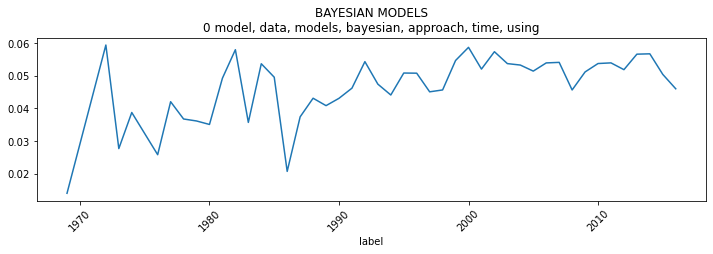

In [88]:
show_trend(0,'line')

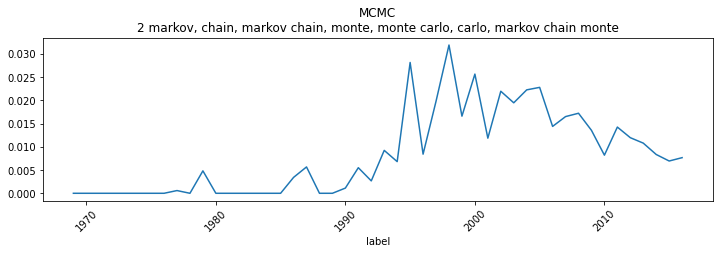

In [89]:
show_trend(2,'line')

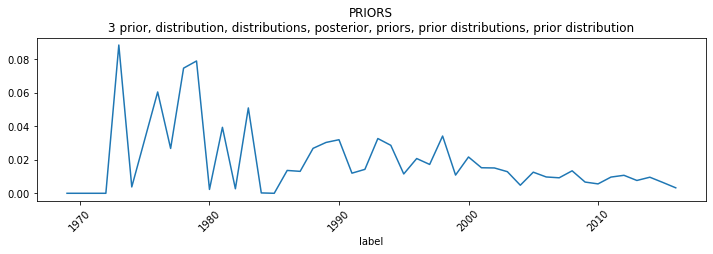

In [90]:
show_trend(3,'line')

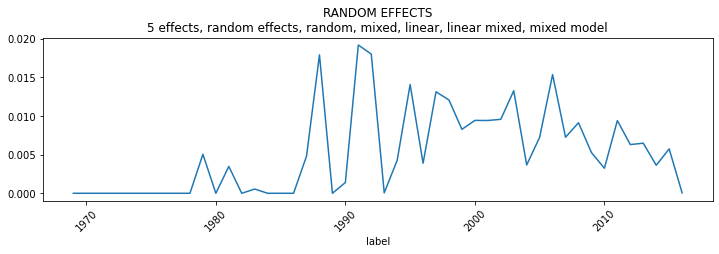

In [91]:
show_trend(5,'line')

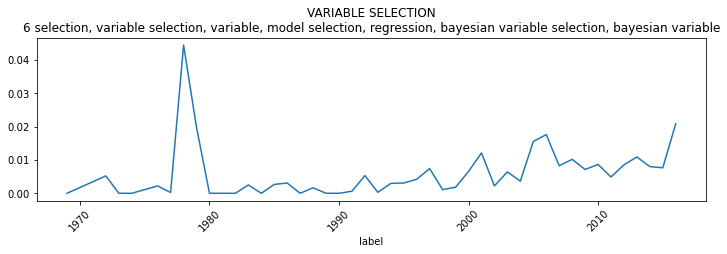

In [92]:
show_trend(6,'line')

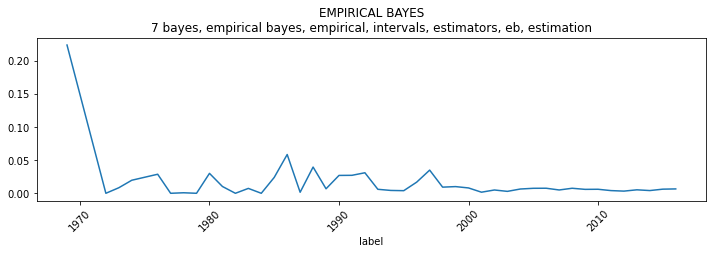

In [93]:
show_trend(7,'line')

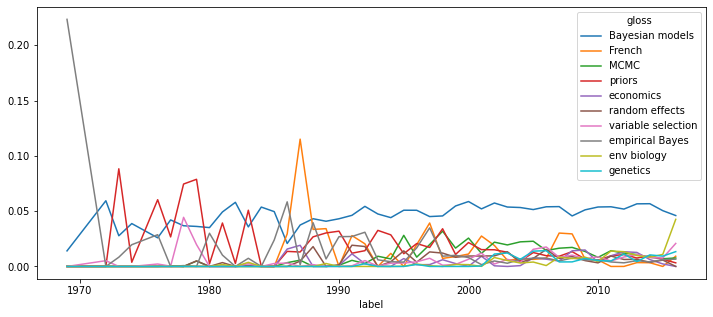

In [94]:
TRENDS.plot(figsize=(12, 5));

In [33]:
import plotly_express as px

In [96]:
px.line(TRENDS)

In [97]:
px.bar(TRENDS)